<a href="https://colab.research.google.com/github/Asmaaad37/Machine-Learning/blob/main/Youtubers-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # Linear Algebra

In [ ]:
# Youtube Channels Ananlysis
# Importing Neccesary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from plotnine import *

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Understanding the Dataset
# *Rank : Ranking is given / based on popularity and performance.
# *Youtuber : Name of the Youtuber or channel
# *Subscribers : Number of subscribers
# *Video Views : Total video views
# *Video count : Total videos uploaded
# *Category : Genre/category of the channel
# *Started : Year the channel was created

In [ ]:
# Load the Dataset
df = pd.read_csv('Top Youtubers Dataset.csv', encoding = 'latin-1')
df.head()

,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
1,2,T-Series,268000000,2.586240e+11,21237,Music,2006
2,3,YouTube Movies,181000000,0.000000e+00,0,Film & Animation,2015
3,4,Cocomelon - Nursery Rhymes,177000000,1.828810e+11,1188,Education,2006
4,5,SET India,174000000,1.653950e+11,139720,Shows,2006


In [ ]:
# EDA (Exploratory Data Analysis)
# Checking Null Values
df.isnull().sum()

Rank            0
Youtuber        0
Subscribers     0
Video Views     0
Video Count     0
Category       43
Started         0
dtype: int64

In [ ]:
# Verifying Category NAN Values
df['Category'].value_counts(dropna = False)

Category
Entertainment            269
Music                    172
People & Blogs           152
Gaming                    92
Comedy                    71
Film & Animation          45
NaN                       43
Education                 41
News & Politics           28
Howto & Style             28
Sports                    17
Science & Technology      15
Shows                     13
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Name: count, dtype: int64

In [ ]:
# Checking For Duplicate Values
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [ ]:
# Setting the display format for floating-point numbers
pd.options.display.float_format = '{:,.2f}' .format

In [ ]:
# Checking the mean values of the cols
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,"1,000.00",500.50,288.82,1.00,250.75,500.50,750.25,"1,000.00"
Subscribers,"1,000.00","26,624,300.00","20,067,680.77","14,500,000.00","16,700,000.00","20,800,000.00","29,275,000.00","284,000,000.00"
Video Views,"1,000.00","13,301,332,968.48","16,041,795,532.78",0.00,"5,272,816,660.50","9,790,981,375.50","16,264,534,026.00","258,624,000,000.00"
Video Count,"1,000.00","12,461.28","43,098.75",0.00,518.50,"1,242.00","3,981.00","386,195.00"
Started,"1,000.00","2,013.60",4.61,"1,970.00","2,011.00","2,014.00","2,017.00","2,024.00"


In [ ]:
# Visualization Phase
# Distribution of Subscribers with the help of Histogram

# Creating a Histogram
fig = px.histogram(df, x = 'Subscribers', nbins=50, title= 'Subscribers Distribution')

# Update Traces to add Labels
fig.update_traces(
    texttemplate='%{y}',
    textposition='outside'
)

fig.show()

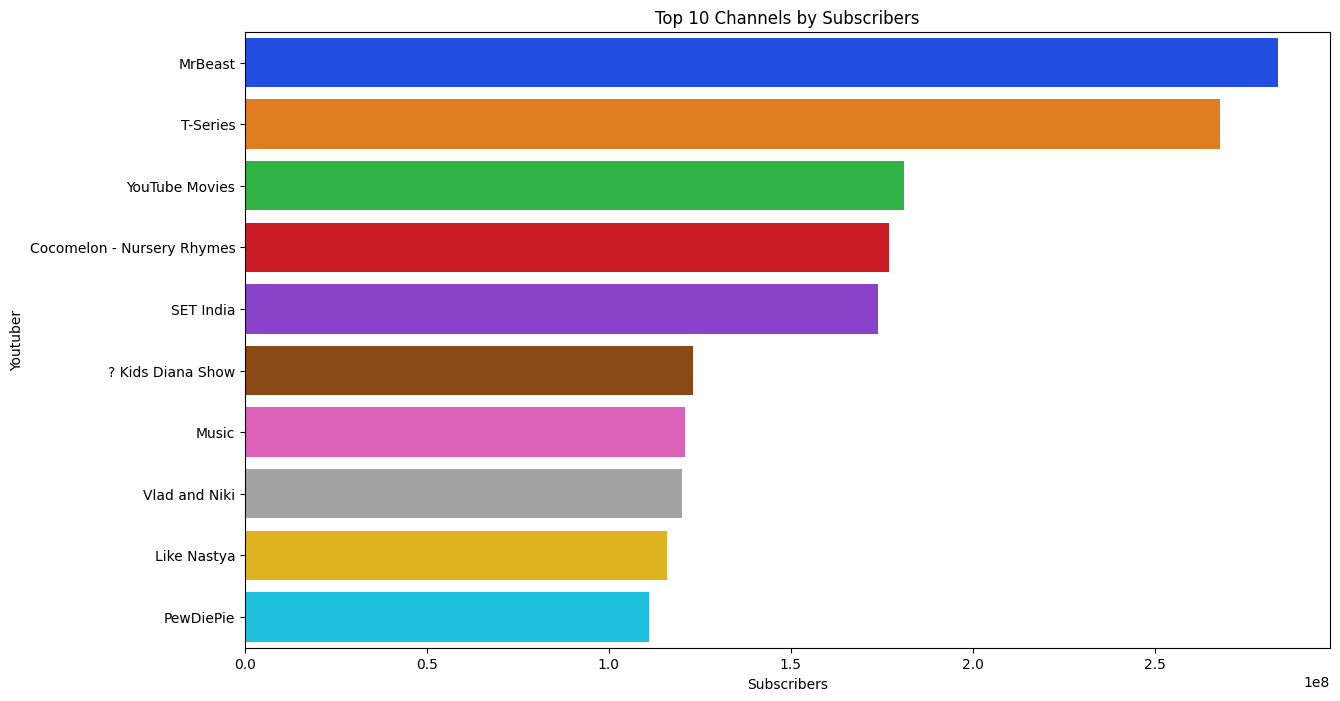

In [ ]:
# Top 10 Channels by subscribers
top_channels = df.sort_values(by = 'Subscribers', ascending = False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_channels['Subscribers'], y=top_channels['Youtuber'], palette='bright')
plt.title('Top 10 Channels by Subscribers')
plt.show()

In [ ]:
# Identify the top 5 channels by subscribers
top_5_channels = df.nlargest(5, 'Subscribers')

# Define the vanish palette / Colour Scheme
vanish_colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]

# Creating a Bar Graph of video views for the top 5 channels
fig = px.bar(
    top_5_channels,
    x='Youtuber',
    y='Video Views',
    title='Video Views for top 5 YT Channels',
    color='Youtuber',
    color_discrete_sequence=vanish_colors
)

fig.show()

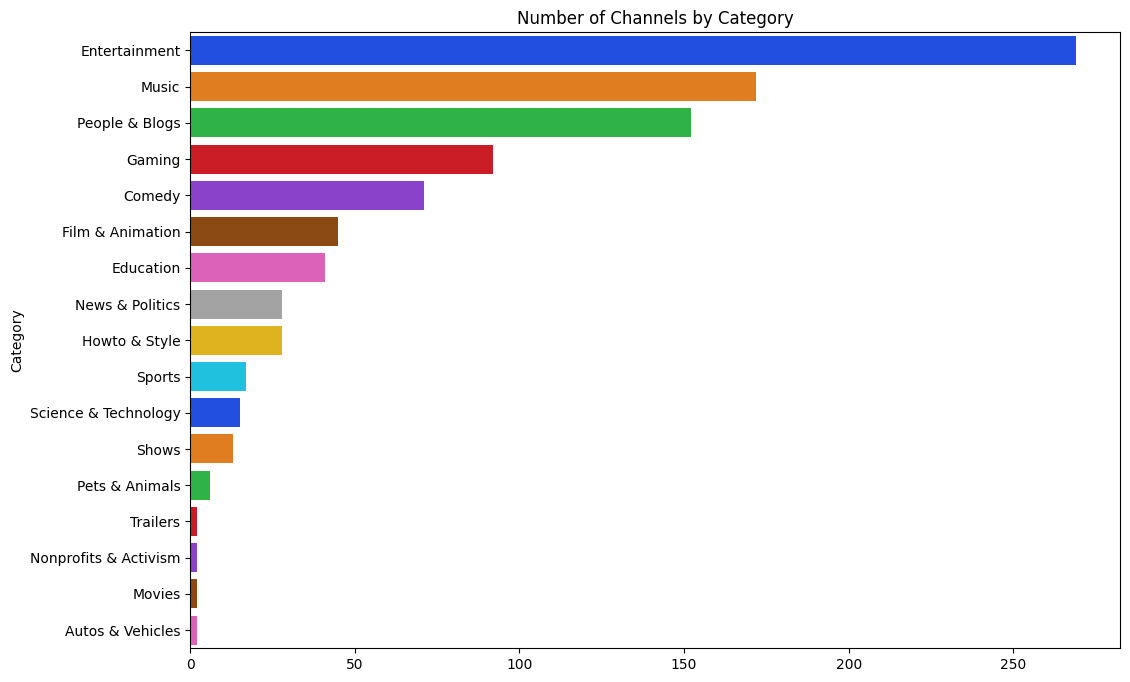

In [ ]:
# Category Analysis
category_counts = df['Category'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='bright')
plt.title('Number of Channels by Category')
plt.show()